<a href="https://colab.research.google.com/github/tsparaskevas/ML_EDDE3/blob/main/Code_for_multiple_ML_predictions_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####Εισαγγή βιβλιοθηκών

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import RepeatedKFold
import seaborn as sns

####Εισαγωγή dataset και δημιουργία dataframe

In [ ]:
# Εισαγωγή στοιχείων του csv
data_url = "https://raw.githubusercontent.com/datajour-gr/ML-algorithms/master/week%206/winequality-white.csv"
sep = ";"
header = 0
na_values = ["N/A"]

In [ ]:
# Δημιουργία dataframe από το dataset
df = pd.read_csv(data_url, sep=sep, header=header, na_values = na_values)

Επισκόπηση dataframe

In [ ]:
print(df.info(), "\n")
print(df.dtypes, "\n")
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB
None 

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar         

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Describe target variable

In [ ]:
# Set target name
target = "quality"

In [ ]:
print(df[target].describe())

count    4898.000000
mean        5.877909
std         0.885639
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64


####Dataset Info and Variables description

**Dataset Info**:
* Data Set Characteristics: Multivariate
* Associated Tasks: Classification, Regression
* Number of Instances: 4898
* Number of Attributes: 12
* Missing Values? N/A

**Attribute Information**:

For more information, read [Cortez et al., 2009].

Input variables (based on physicochemical tests):
1. fixed acidity
2. volatile acidity
3. citric acid
4. residual sugar
5. chlorides
6. free sulfur dioxide
7. total sulfur dioxide
8. density
9. pH
10. sulphates
11. alcohol

Output variable (based on sensory data):
12. quality (score between 0 and 10)

####Missing values

In [ ]:
# Αναζήτηση missing values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
# Επισκόπηση των missing values
df.loc[df.isnull().any(axis=1)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


In [ ]:
# Συμπλήρωση των missing values με τη μέση τιμή
df.update(df.fillna(df.mean()))

####Ιστογράμματα των μεταβλητών

In [ ]:
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")

cols_nbr = len(df.columns)
plots_h = int(cols_nbr / 4)

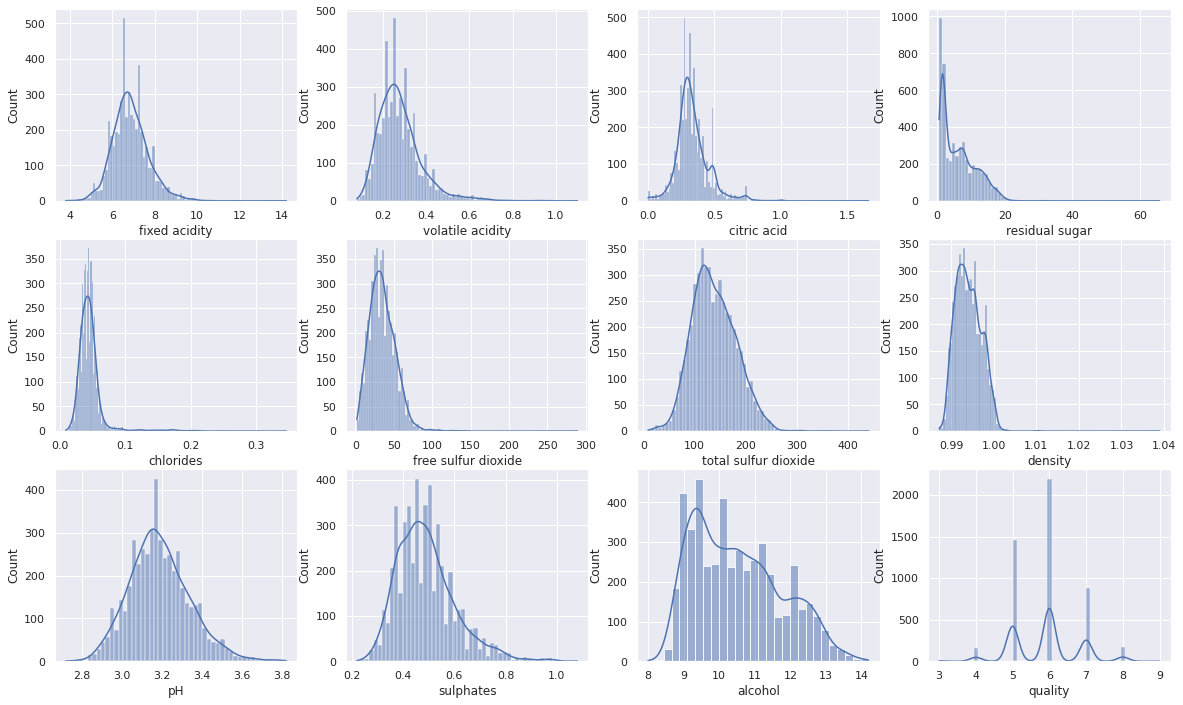

In [ ]:
fig, axs = plt.subplots(plots_h, 4, figsize=(20, plots_h*4))

for i in range(0, cols_nbr):
  if i < 4:
    plot_row = 0
  elif i < 8:
    plot_row = 1
  elif i < 12:
    plot_row = 2
  elif i < 16:
    plot_row = 3
  elif i < 20:
    plot_row = 4
  plot_col = (i+4) % 4
  sns.histplot(data=df, kde=True, x=df.columns[i], ax=axs[plot_row, plot_col])



**Παρατηρήσεις**

####Επισκόπηση της κατανομής του target

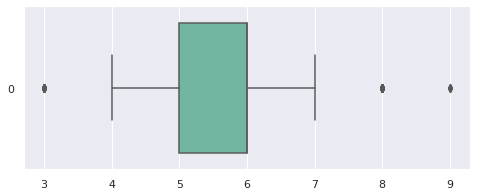

In [ ]:
sns.set(rc = {'figure.figsize':(8,3)})
sns.boxplot(data=df[target], palette="Set2", orient="h") # orient="h" για να το κάνω οριζόντιο

####Correlation των μεταβλητών

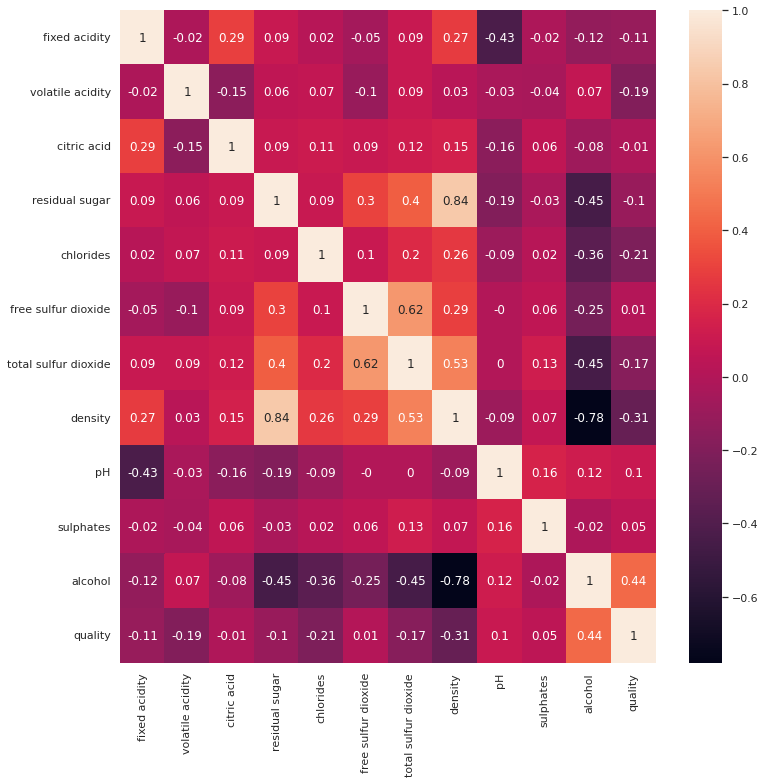

In [ ]:
# Έλεγχος της συσχέτισης των μεταβλητών μεταξύ τους (συντελεστής γραμμικής συσχέτισης του Pearson ή δειγματικός συντελεστής συσχέτισης r)R
correlation_matrix = df.corr().round(2)
# Set figure size
plt.figure(figsize=(12, 12))
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

Έλεγχος για μεγάλη συσχέτιση μεταξύ των ανεξάρτητων μεταβλητών

In [ ]:
for a in range(len(df.corr().columns)):
    for b in range(a):
        if abs(df.corr().iloc[a,b]) >0.7:
            name1 = df.corr().columns[a]
            name2 = df.corr().columns[b]
            print(name1, "-", name2, ":::", round((df.corr().iloc[a,b]),2))

density - residual sugar ::: 0.84
alcohol - density ::: -0.78


Εντοπισμός της ανεξάρτητης μεταβλητής που σχετίζεται περισσότερο με το target

In [ ]:
max_target_corr = df.corr().iloc[:-1][target].max()
df.corr()[df.corr()[target] == max_target_corr]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
alcohol,-0.120881,0.067718,-0.075729,-0.450631,-0.360189,-0.250104,-0.448892,-0.780138,0.121432,-0.017433,1.0,0.435575


####Ορισμός Χ και Υ

In [ ]:
X = df.drop(columns = target)
y = df[target]

####Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# Fit the scaler
scale_fit = scaler.fit(X)
scaledX = scale_fit.transform(X)
Xn = pd.DataFrame(scaledX, columns=X.columns)
# display values
Xn.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.307692,0.186275,0.216867,0.308282,0.106825,0.149826,0.373550,0.267785,0.254545,0.267442,0.129032
1,0.240385,0.215686,0.204819,0.015337,0.118694,0.041812,0.285383,0.132832,0.527273,0.313953,0.241935
2,0.413462,0.196078,0.240964,0.096626,0.121662,0.097561,0.204176,0.154039,0.490909,0.255814,0.338710
3,0.326923,0.147059,0.192771,0.121166,0.145401,0.156794,0.410673,0.163678,0.427273,0.209302,0.306452
4,0.326923,0.147059,0.192771,0.121166,0.145401,0.156794,0.410673,0.163678,0.427273,0.209302,0.306452


####Cross Validation

In [ ]:
# Cross-Validation (cv)
cv = RepeatedKFold(n_splits=10, n_repeats=10)

In [ ]:
# function για linear regression
def Lin_Reg():
  global y_pred_test
  global r2
  global results_df
  global degree_nbr
  global depth
  global min_splits
  global pred_model
  global cv_nbr
  global rmse
  lin_reg = LinearRegression()
  # Εκπαίδευση στο train set
  lin_reg.fit(X_train, y_train)
  # Πρόβλεψη στο test set
  y_pred_test = lin_reg.predict(X_test)
  # Υπολογισμός root mean squared error
  rmse = (np.sqrt(mean_squared_error(y_test, y_pred_test)))
  # Υπολογισμός του R2 score
  r2 = r2_score(y_test, y_pred_test)
  # Ενημέρωση στις λίστες
  depth = 0
  degree_nbr = 0
  min_splits = 0
  results = [cv_nbr, pred_model, degree_nbr, depth, min_splits, rmse, r2]
  new_row = len(results_df)
  results_df.loc[new_row] = results
  #r2_scores.append(r2) # αυτή η γραμμή είναι σωστή και δεν χρειάζεται αλλαγή 
  #.append(y_test)
  #ls_predicted_values.append(y_pred_test)

In [ ]:
# Function για Polynominal Regression
from sklearn.preprocessing import PolynomialFeatures

def create_polynomial_regression_model(degree):
  "Creates a polynomial regression model for the given degree"
  global y_pred_test
  global r2
  global results_df
  global degree_nbr
  global depth
  global min_splits
  global pred_model
  global cv_nbr
  global rmse

  poly_features = PolynomialFeatures(degree=degree)
  
  # transforms the existing features to higher degree features.
  X_train_poly = poly_features.fit_transform(X_train)
  
  # fit the transformed features to Linear Regression
  poly_model = LinearRegression()
  poly_model.fit(X_train_poly, y_train)
  
  # predicting on test data-set
  y_test_pred = poly_model.predict(poly_features.fit_transform(X_test))
  
  # evaluating the model on test dataset
  rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
  r2 = r2_score(y_test, y_test_pred)
  # Ενημέρωση στις λίστες
  depth = int(max_depth)
  degree_nbr = int(degree)
  min_splits = 0
  results = [cv_nbr, pred_model, degree_nbr, depth, min_splits, rmse, r2]
  new_row = len(results_df)
  results_df.loc[new_row] = results

In [ ]:
# Function για εκτέλεση του Polynominal Regression function για διαφορετικό degree: 1-4

def Poly_Reg():
  #degrees = np.linspace(1, 5, 5, endpoint=True)
  for degree in range(1, 5):
    create_polynomial_regression_model(degree=degree)

In [ ]:
# function για Decision Tree Regressor με loop στο max_depth και στο min_samples_splits
def DT_Reg():
  global y_pred_test
  global r2
  global results_df
  global depth
  global degree_nbr
  global min_splits
  global pred_model
  global cv_nbr
  global rmse
  global max_depth
  max_depths = np.linspace(1, 22, 22, endpoint=True)
  for max_depth in max_depths:    
    min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
    for min_samples_split in min_samples_splits:
      dtr = DecisionTreeRegressor(max_depth=max_depth, min_samples_split=min_samples_split)
      # Εκπαίδευση στο train set
      dtr.fit(X_train, y_train)
      # Πρόβλεψη στο test set
      y_pred_test = dtr.predict(X_test)
      # Υπολογισμός root mean squared error
      rmse = (np.sqrt(mean_squared_error(y_test, y_pred_test)))
      # Υπολογισμός του r2 
      r2 = r2_score(y_test, y_pred_test)
      # Ενημέρωση στις λίστες
      depth = int(max_depth)
      degree_nbr = 0
      min_splits = min_samples_split
      results = [cv_nbr, pred_model, degree_nbr, depth, min_splits, rmse, r2]
      new_row = len(results_df)
      results_df.loc[new_row] = results

In [ ]:
#def append2lists(model_name):
  #r2_scores_name = "r2_scores_" + model_name
  #globals()[r2_scores_name].append(r2)
  #ls_true_values_Lin_Reg_name = "ls_true_values_" + model_name
  #globals()[ls_true_values_Lin_Reg_name].append(y_test)
  #ls_pred_values_name = "ls_pred_values_" + model_name
  #globals()[ls_pred_values_name].append(y_pred_test)

In [ ]:
# function για ΟΛΑ τα μοντέλα
def run_ML_model(model_name):
  if model_name == "Lin_Reg":
    Lin_Reg()
  elif model_name == "Poly_Reg":
    Poly_Reg()
  elif model_name == "DT_Reg":
    DT_Reg()
  #elif model_name == "RF":
    #RF()

In [ ]:
y_pred_test = []
r2 = 0.0
rmse = 0.0
results_df = pd.DataFrame(columns=['CV_nbr', 'Model', 'Degree', 'Max depth', 'Min samples split', 'RMSE', 'R2'], index=[0])
cv_nbr = 0
depth = 0
max_depth = 0
min_splits = 0
degree_nbr = 0
models = ['Lin_Reg', 'Poly_Reg', 'DT_Reg']
for i_train, i_test in cv.split(Xn):
  # Oρισμός των train και test sets σύμφωνα με το split
  X_train, X_test, y_train, y_test = Xn.iloc[i_train], Xn.iloc[i_test], y.iloc[i_train], y.iloc[i_test] 
  cv_nbr += 1
  for mod in models:
    pred_model = mod
    run_ML_model(model_name=mod)


In [ ]:
results_df

,CV_nbr,Model,Degree,Max depth,Min samples split,RMSE,R2
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Lin_Reg,0,0,0,0.761796,0.251132
2,1,Poly_Reg,1,0,0,0.761796,0.251132
3,1,Poly_Reg,2,0,0,0.728407,0.315339
4,1,Poly_Reg,3,0,0,0.819074,0.134287
...,...,...,...,...,...,...,...
22496,100,DT_Reg,0,22,0.6,0.807317,0.177782
22497,100,DT_Reg,0,22,0.7,0.814307,0.163483
22498,100,DT_Reg,0,22,0.8,0.814307,0.163483
22499,100,DT_Reg,0,22,0.9,0.814307,0.163483


In [ ]:
# Means for Linear Regression
d = 0
md = 0
mss = 0
mean_r2 = round(results_df[results_df['Model'] == 'Lin_Reg']['R2'].mean(), 2)
std_r2 = round(results_df[results_df['Model'] == 'Lin_Reg']['R2'].std(ddof=0), 2)
mean_rmse = round(results_df[results_df['Model'] == 'Lin_Reg']['RMSE'].mean(), 2)
std_rmse = round(results_df[results_df['Model'] == 'Lin_Reg']['RMSE'].std(ddof=0), 2)

r2_results = ["Lin_Reg", d, md, mss, mean_rmse, std_rmse, mean_r2, std_r2]
r2_df = pd.DataFrame(columns=['Model', 'Degree', 'Max depth', 'Min split', 'meanRMSE', 'stdRMSE', 'meanR2', 'stdR2'], index=[0])
r2_df.loc[0] = r2_results

In [ ]:
# Means for Polynominal Regression
d = 0
md = 0
mss = 0
for d in range(1, 5):
  mean_r2 = round(results_df[(results_df['Model'] == 'Poly_Reg') & (results_df['Degree'] == d)]['R2'].mean(), 2)
  std_r2 = round(results_df[(results_df['Model'] == 'Poly_Reg') & (results_df['Degree'] == d)]['R2'].std(ddof=0), 2)
  mean_rmse = round(results_df[(results_df['Model'] == 'Poly_Reg') & (results_df['Degree'] == d)]['RMSE'].mean(), 2)
  std_rmse = round(results_df[(results_df['Model'] == 'Poly_Reg') & (results_df['Degree'] == d)]['RMSE'].std(ddof=0), 2)
  r2_results = ["Poly_Reg", d, md, mss, mean_rmse, std_rmse, mean_r2, std_r2]
  new_row = len(r2_df)
  r2_df.loc[new_row] = r2_results

In [ ]:
# Means for Decision Tree Regression
d = 0
md = 0
split = 0
for depth in range(1,23):
  splits = np.linspace(0.1, 1.0, 10, endpoint=True)
  for split in splits:
    mean_r2 = round(results_df[(results_df['Model'] == 'DT_Reg') & (results_df['Max depth'] == depth) & (results_df['Min samples split'] == split)]['R2'].mean(), 2)
    std_r2 = round(results_df[(results_df['Model'] == 'DT_Reg') & (results_df['Max depth'] == depth) & (results_df['Min samples split'] == split)]['R2'].std(ddof=0), 2)
    mean_rmse = round(results_df[(results_df['Model'] == 'DT_Reg') & (results_df['Max depth'] == depth) & (results_df['Min samples split'] == split)]['R2'].mean(), 2)
    std_rmse = round(results_df[(results_df['Model'] == 'DT_Reg') & (results_df['Max depth'] == depth) & (results_df['Min samples split'] == split)]['R2'].std(ddof=0), 2)
    r2_results = ["DT_Reg", d, depth, split, mean_rmse, std_rmse, mean_r2, std_r2]
    new_row = len(r2_df)
    r2_df.loc[new_row] = r2_results

In [ ]:
r2_df[r2_df['meanR2'] == r2_df['meanR2'].max()]

,Model,Degree,Max depth,Min split,meanRMSE,stdRMSE,meanR2,stdR2
2,Poly_Reg,2,0,0,0.74,0.05,0.3,0.1
55,DT_Reg,0,6,0.1,0.3,0.04,0.3,0.04
65,DT_Reg,0,7,0.1,0.3,0.04,0.3,0.04
75,DT_Reg,0,8,0.1,0.3,0.04,0.3,0.04
85,DT_Reg,0,9,0.1,0.3,0.04,0.3,0.04
95,DT_Reg,0,10,0.1,0.3,0.04,0.3,0.04
105,DT_Reg,0,11,0.1,0.3,0.04,0.3,0.04
115,DT_Reg,0,12,0.1,0.3,0.04,0.3,0.04
125,DT_Reg,0,13,0.1,0.3,0.04,0.3,0.04
135,DT_Reg,0,14,0.1,0.3,0.04,0.3,0.04


In [ ]:
r2_df.sort_values(['meanR2', 'stdR2'], ascending=[False, True]).head(3)

,Model,Degree,Max depth,Min split,meanRMSE,stdRMSE,meanR2,stdR2
55,DT_Reg,0,6,0.1,0.3,0.04,0.3,0.04
65,DT_Reg,0,7,0.1,0.3,0.04,0.3,0.04
75,DT_Reg,0,8,0.1,0.3,0.04,0.3,0.04


####Wine conversion for Classification version

In [ ]:
# Create Classification version of target variable
df['goodquality'] = [1 if x >= 7 else 0 for x in df['quality']]

In [ ]:
# See proportion of good vs bad wines
df['goodquality'].value_counts()

0    3838
1    1060
Name: goodquality, dtype: int64